<a href="https://colab.research.google.com/github/lucas-azdias/Conteudo-Universidade/blob/master/Ci%C3%AAncia%20da%20Computa%C3%A7%C3%A3o/6%C2%BA%20Per%C3%ADodo/Aprendizagem%20de%20M%C3%A1quina/%5BTAREFAS%5D/Avalia%C3%A7%C3%A3o%20Somativa%2001%20(TDE1%20-%208hrs)/Implementa%C3%A7%C3%A3o%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENVIRONMENT

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

import numpy as np

import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors


from typing import Iterable

# FUNCTIONS

In [ ]:
# Ploting model dataset function
def model_dataset_plot(model_data, model_labels):
    _, ax = plt.subplots()
    for n_class in range(0, len(np.unique(model_labels))):
        ax.scatter(
            model_data[model_labels==n_class, 0],
            model_data[model_labels==n_class, 1],
            c=tuple(mcolors.BASE_COLORS.keys())[n_class],
            label=str(n_class)
        )
    ax.legend()
    plt.show()


# Model analysis function
def model_analysis(labels, test_labels, predicted_labels):
    print("Accuracy Score:", sklearn.metrics.accuracy_score(test_labels, predicted_labels), end="\n\n")
    print(sklearn.metrics.classification_report(test_labels, predicted_labels))

    cm = sklearn.metrics.confusion_matrix(test_labels, predicted_labels, labels=labels)
    sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()

# LOADING MODEL


In [ ]:
# Defining the random seed
random_seed = 9999

# Loading the model dataset
data, labels = sklearn.datasets.load_breast_cancer(return_X_y=True)

# Ploting model dataset
#model_dataset_plot(data, labels)

# Splitting the model dataset into train/test groups
train_data, test_data, train_labels, test_labels = sklearn.model_selection.train_test_split(
    data,
    labels,
    train_size=0.7,
    test_size=0.3,
    random_state=random_seed
)

# Defining the common parameters
p = 2
k_neighbors = 5

# SCIKIT-LEARN MODEL IMPLEMENTATION


Accuracy Score: 0.935672514619883

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.96      0.95      0.95       118

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



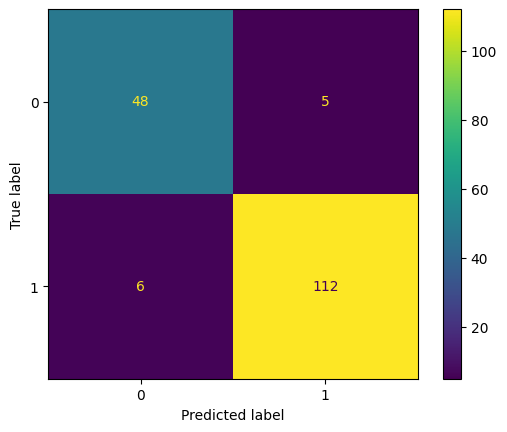

In [ ]:
sk_knn = sklearn.neighbors.KNeighborsClassifier(
    metric="minkowski",
    p=p,
    n_jobs=1,
    n_neighbors=k_neighbors
)

# Train the model
sk_knn.fit(train_data, train_labels)

# Test the model
predicted_labels = sk_knn.predict(test_data)

# Model analysis
model_analysis(np.unique(train_labels), test_labels, predicted_labels)

# OWN MODEL IMPLEMENTATION


Accuracy Score: 0.935672514619883

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.96      0.95      0.95       118

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



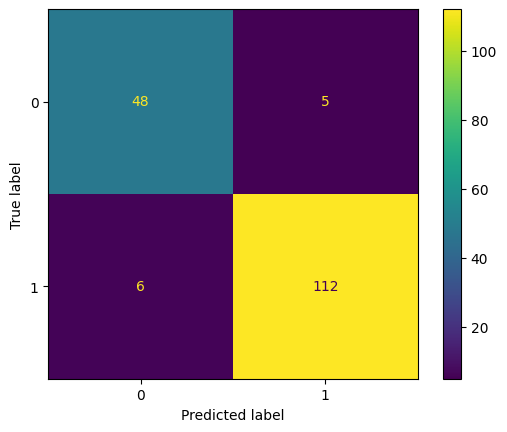

In [ ]:
class knn():

    def __init__(self, p:int, k_neighbors:int) -> None:
        self.p = p
        self.k_neighbors = k_neighbors


    def __minkowski(self, u:Iterable, v:Iterable) -> float:
        if len(u) != len(v):
            raise ValueError("Vectors of different sizes passed as arguments")

        # distance = 0
        # for i in range(0, len(u)):
        #     distance += np.power(np.abs(u[i] - v[i]), self.p)

        distance = np.sum(np.power(np.abs(np.subtract(u, v)), self.p))

        distance = np.power(distance, np.divide(1, p))

        return distance


    def fit(self, data, labels) -> None:
        self.data = data
        self.labels = labels


    def predict(self, data) -> tuple:
        labels = list()
        for instance in data:
            distances = list()
            for i in range(0, len(self.data)):
                distances.append((self.__minkowski(instance, self.data[i]), self.labels[i]))

            distances.sort(key=lambda x: x[0])

            votes = {k: 0 for k in np.unique(self.labels)}
            for i in range(0, self.k_neighbors):
                votes[distances[i][1]] += 1

            # print(votes, max(*votes.items(), key=lambda x: x[1])[0])

            labels.append(max(*votes.items(), key=lambda x: x[1])[0])

        return tuple(labels)


own_knn = knn(p=p, k_neighbors=k_neighbors)

# Train the model
own_knn.fit(train_data, train_labels)

# Test the model
own_knn.predict(test_data)

# Model analysis
model_analysis(np.unique(train_labels), test_labels, predicted_labels)